<a href="https://colab.research.google.com/github/sandralayas/My-Works/blob/Artificial-Intelligence/MNIST_Handwritten_Digits_sub_question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN to classify handwritten digits

Data Preprocessing (Medium)
Load the MNIST handwritten digit dataset and perform the following pre- processing steps:

*   Normalize the pixel values of the images.
*   Apply one-hot encoding to the target labels.
*   Split the data into training, validation, and test sets.

Dataset: https://github.com/iamavieira/handwritten-digits-mnist

Classification (Hard)
Build a logistic regression model to classify handwritten digits from the MNIST dataset:

*   Evaluate the model performance using accuracy, precision, recall, and F1 score.
*   Fine-tune the model hyperparameters using grid search CV to improve performance.
*   Visualize the decision boundary of the model.

### Importing Tensorflow and MNIST Dataset

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Other Libraries
import numpy as np

#Plot Paramenters
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

##### Importing MNIST Dataset

In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Dataset size
print("Training Data Shape \t: X : ",X_train.shape, " y : ",y_train.shape)
print("Test Data Shape \t: X : ",X_test.shape, " y : ",y_test.shape)

Training Data Shape 	: X :  (60000, 28, 28)  y :  (60000,)
Test Data Shape 	: X :  (10000, 28, 28)  y :  (10000,)


Thus, we have total of 70,000 28X28 pixels images, of which 60,000 are in training set and rest 10,000 in test data set

### Preview Few Random Images
-------


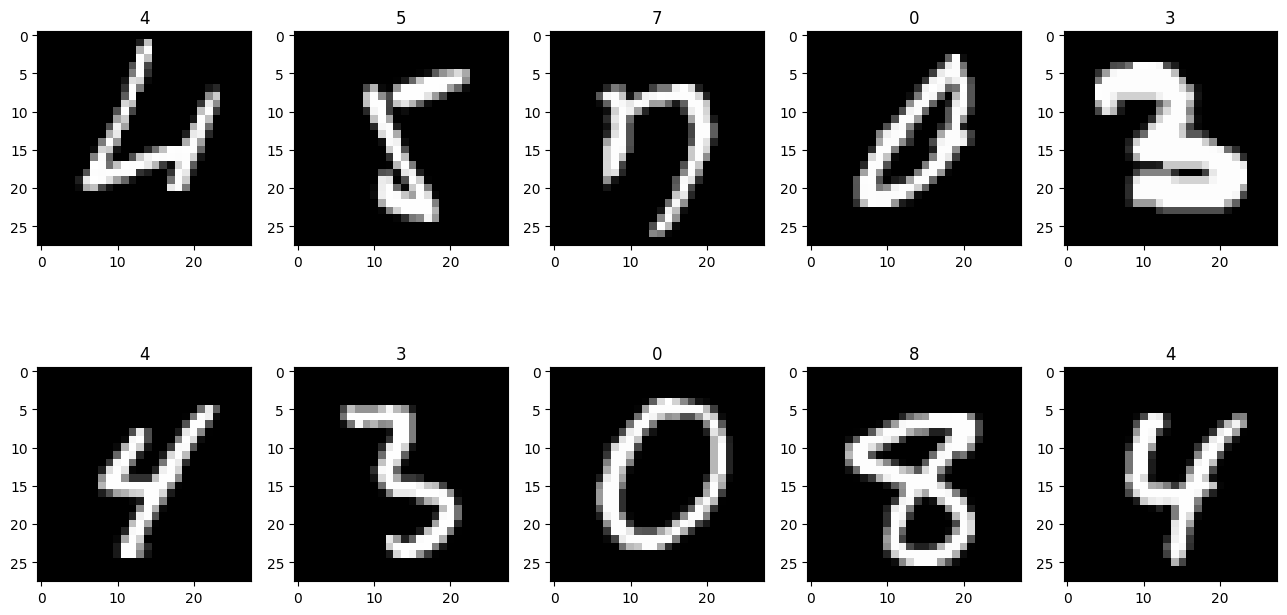

In [8]:
rand_arr = np.random.randint(low=1,high=len(X_train),size=(10,))
for i in range(0,len(rand_arr)):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[rand_arr[i]],cmap=plt.get_cmap('gray'))
  plt.title(y_train[rand_arr[i]])

#### Preprocess Data

In [9]:
#One-hot encode the y variable
y_train  = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

#Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

Image Data Shape (1797, 64)
Label Data Shape (1797,)
0.9511111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


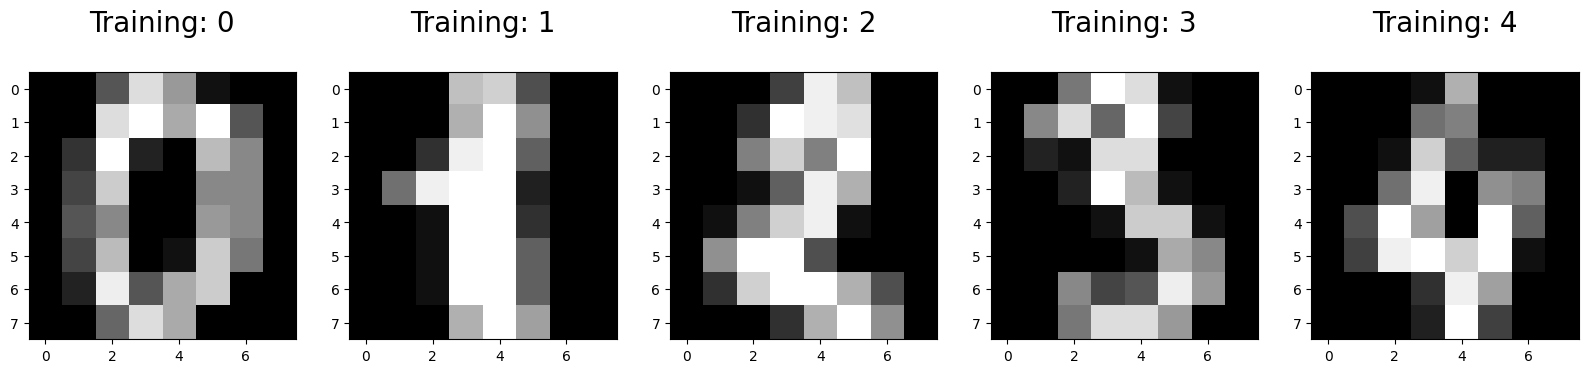

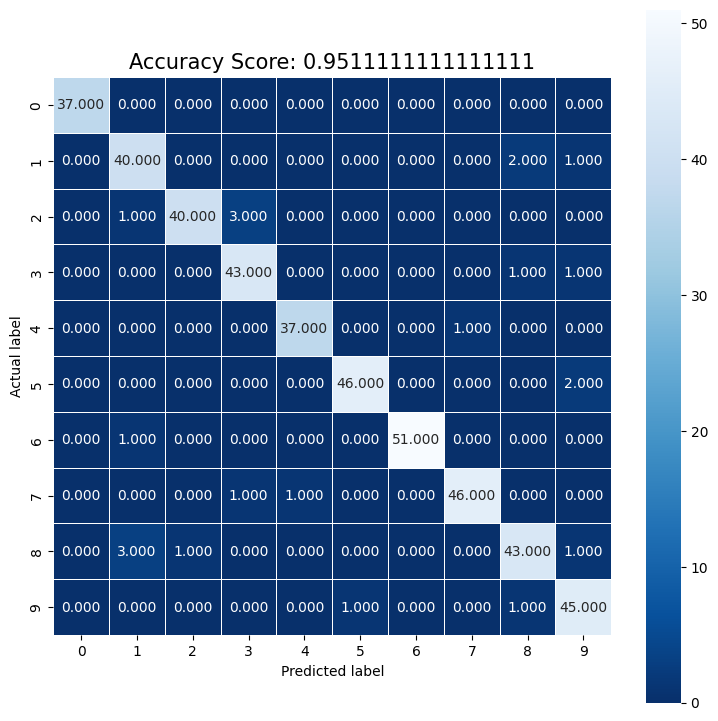

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);